# Data Cleaning for Beats

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

# Assuming the file name is 'movies.csv'
df = pd.read_csv('new_reference_data_for_beats.csv')
df.head()

Saving new_reference_data_for_beats.csv to new_reference_data_for_beats (1).csv


,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R1TIU27G892G8N,B09GJVTRNZ,5.0 out of 5 stars Best for modern music; fine...,Glut & Lack: troublemaking twins,5,Love this little speaker for the music I (and ...,"Reviewed in the United States January 14, 2025",AEMU5GYR7E7YH5B64AKBUNZ5Y4PA,1,19,"Color: Blue, Style: Flip 6"
1,R3UHPD69SUVF4D,B09GJVTRNZ,5.0 out of 5 stars Incredible Sound and Perfor...,Seva,5,I recently bought the JBL Flip 6 Portable Blue...,"Reviewed in the United States January 4, 2025",AF2OOF3FJWVX65HP72K6CVPMONRA,1,14,"Color: Teal, Style: Flip 6"
2,R8ZPP4M7T18BO,B09GJVTRNZ,5.0 out of 5 stars The Sound Is Great,Michelle,5,I'm so glad I bought this. I use it daily I ha...,"Reviewed in the United States April 16, 2025",AHHSFRGEAFWTV24U7MFCK7V54P7Q,1,1,"Color: Blue, Style: Flip 6"
3,R3T9HSXO492VDG,B09GJVTRNZ,5.0 out of 5 stars Incredible Sound and Durabi...,Paola J Franco,5,The sound quality is amazing for such a compac...,"Reviewed in the United States February 28, 2025",AGIUPLMVY4PLRDFR6DCBYAG53LWQ,1,6,"Color: White, Style: Flip 6"
4,RF4X9MUCFL4QZ,B09GJVTRNZ,5.0 out of 5 stars Not too small Not too big,Nikki Fox,5,"These are not huge, but great for my sports pl...","Reviewed in the United States April 17, 2025",AEP7HYGSBZ5Q2DII5UM2CWYXUQUA,1,1,"Color: Blue, Style: Flip 6"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           4990 non-null   object
 1   product_id          4990 non-null   object
 2   title               4990 non-null   object
 3   author              4989 non-null   object
 4   rating              4990 non-null   int64 
 5   content             4982 non-null   object
 6   timestamp           4990 non-null   object
 7   profile_id          4990 non-null   object
 8   is_verified         4990 non-null   int64 
 9   helpful_count       4990 non-null   int64 
 10  product_attributes  4766 non-null   object
dtypes: int64(3), object(8)
memory usage: 429.0+ KB


In [4]:
df.isna().sum()

,0
review_id,0
product_id,0
title,0
author,1
rating,0
content,8
timestamp,0
profile_id,0
is_verified,0
helpful_count,0


In [5]:
df.shape

(4990, 11)

In [6]:
df = df.dropna()
df.isna().sum()

,0
review_id,0
product_id,0
title,0
author,0
rating,0
content,0
timestamp,0
profile_id,0
is_verified,0
helpful_count,0


In [7]:
df.shape

(4758, 11)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['product_id'].unique()

array(['B09GJVTRNZ', 'B0BYC52LYP', 'B08X4YMTPM', 'B0D6WD2QSQ',
       'B0DYB6KMJH', 'B0CVFKZ1LC', 'B0BW34LCB8', 'B09PYVXXW5',
       'B09FM6PDHP', 'B09HN594TL', 'B096SV8SJG', 'B0BTZKP1TP',
       'B08ZR5JB9G', 'B0C2F5KD26', 'B0BYPFNW6T', 'B093SLWMS7',
       'B0CXL4FQBK', 'B099TJGJ91', 'B0D4SX9RC6', 'B0B44F1GGK',
       'B09XXW54QG', 'B07DD3WBYW', 'B07YBN9XXG', 'B0CY6S748H',
       'B01IOD7KB6', 'B0CVFM97GD', 'B08NLCW9WY', 'B08YRT9T38',
       'B08VL5S148', 'B097XX34SL', 'B07PXGQC1Q', 'B0BZ9WMLNQ',
       'B0D3JB14QS', 'B0BQPNMXQV', 'B0C1QWWZR4', 'B0CF7GYNW2',
       'B09CFP6J6D', 'B0BZTCXG6T', 'B0863H1JKB', 'B09JL41N9C',
       'B09V9P5Q6W', 'B0BZK2Z2TC', 'B0C345M3T7', 'B0CD2FSRDD',
       'B0CPFV77W4', 'B0B1NGPY94', 'B0BYSQDWRT', 'B0B2SH4CN6',
       'B09D1HMBQ3', 'B0D4STD5ZC', 'B099TLMRB6', 'B07GWRCZQP',
       'B09GK5JMHK', 'B088KRKFJ3', 'B08Z1RP9K8', 'B0B445JCZ3',
       'B0B43Y8GHZ'], dtype=object)

In [10]:
# Dictionary mapping ASIN to Product Name
product_mapping = {
    'B096SV8SJG': 'Beats Studio Buds',
    'B0D3JB14QS': 'Beats Solo Buds',
    'B09JL41N9C': 'Beats Fit Pro (1st Gen)',
    'B0BZK2Z2TC': 'Beats Studio Buds+',
    'B0C345M3T7': 'Sony WF-1000XM5',
    'B09V9P5Q6W': 'JBL Live Pro 2',
    'B0863H1JKB': 'Panasonic True Wireless Earbuds',
    'B0BZTCXG6T': 'Panasonic ErgoFit True Wireless Earbuds',
    'B09CFP6J6D': 'Sony WF-C500',
    'B0CF7GYNW': 'Samsung Galaxy Buds FE',
    'B0C1QWWZR4': 'JBL Tune Buds',
    'B0BQPNMXQV': 'JBL Vibe Beam'
    # Add more ASIN mappings here
}

# Replace ASIN with Product Name
df['product_name'] = df['product_id'].map(product_mapping)

# Save the updated dataset
df.to_csv('updated_dataset.csv', index=False)

new_df = pd.read_csv('updated_dataset.csv')

print(new_df.shape)
print(new_df.isna().sum())

(4758, 12)
review_id                0
product_id               0
title                    0
author                   0
rating                   0
content                  0
timestamp                0
profile_id               0
is_verified              0
helpful_count            0
product_attributes       0
product_name          3744
dtype: int64


In [11]:
new_df = new_df.dropna()
print(new_df.shape)
print(new_df.isna().sum())

(1014, 12)
review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
product_name          0
dtype: int64


This is an acceptable size for our new dataset, it has over 1000 rows

In [12]:
new_df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name
343,RUUJJA0TERA67,B096SV8SJG,5.0 out of 5 stars Compared to 4 other Earbuds...,Connor,5,I bought these earbuds along with 4 other pair...,"Reviewed in the United States August 11, 2022",AFEITP6Y25NKH3KB2LXWQCC7STIA,1,2277,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds
344,R3EO2GBST2UICI,B096SV8SJG,5.0 out of 5 stars Initial review and comparis...,philip seitz,5,I love these earbuds. They feel definitely wor...,"Reviewed in the United States September 28, 2023",AFMDCDCHBIWSEI6RDYBCY4MXXVZQ,1,562,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds
345,R2D114QWXW4IOU,B096SV8SJG,5.0 out of 5 stars I think they’re great,Maizy,5,I like the sound a lot. I read a previous revi...,"Reviewed in the United States July 27, 2024",AFRVRGYJJSBAELQK6XVCXXBCJXLA,1,3,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds
346,R29LYUZ7DI2CS6,B096SV8SJG,"4.0 out of 5 stars Quality sound and build, BU...",Everest,4,"After using these for a couple weeks straight,...","Reviewed in the United States August 3, 2024",AEDBORE5CT34E6D7QVXFZW5ZERCA,1,0,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds
347,RRC5SI8P44LH4,B096SV8SJG,5.0 out of 5 stars Excellent -- Budget Friendl...,Mary Trotta,5,Been a few months (May 2024) since the purchas...,"Reviewed in the United States July 21, 2024",AGRC63RAW4DZCOTB2NDTUFP7SRFA,1,3,Color: Sunset PinkStyle: Studio BudsSet: Witho...,Beats Studio Buds


In [13]:
new_df.groupby('product_name')['helpful_count'].sum().sort_values(ascending = True)

,helpful_count
product_name,
Panasonic True Wireless Earbuds,32
Panasonic ErgoFit True Wireless Earbuds,101
Beats Solo Buds,147
JBL Tune Buds,290
JBL Live Pro 2,570
Sony WF-C500,728
Beats Studio Buds+,776
Sony WF-1000XM5,919
JBL Vibe Beam,1166


So Beats Studio Buds and Fit Pro First Gen are the Beats earbuds products with the most helpful reviews. JBL Vibe Beam and Sony WF-1000XM5 are next

In [14]:
import statistics
new_df.groupby('product_name')['rating'].mean().sort_values(ascending = True)

,rating
product_name,
Beats Solo Buds,3.090909
Panasonic True Wireless Earbuds,3.230769
Panasonic ErgoFit True Wireless Earbuds,3.617978
Sony WF-1000XM5,4.011111
Sony WF-C500,4.260000
JBL Live Pro 2,4.330000
Beats Studio Buds+,4.330000
JBL Tune Buds,4.360000
Beats Studio Buds,4.426230


The JBL Vibe beam has the highest average star rating follow by Beats Fit Pro 1st Gen and Beats Studio Buds

In [15]:
new_df['product_name'].value_counts()

,count
product_name,
Beats Studio Buds,122
Sony WF-C500,100
JBL Tune Buds,100
Beats Studio Buds+,100
Beats Fit Pro (1st Gen),100
JBL Live Pro 2,100
JBL Vibe Beam,99
Sony WF-1000XM5,90
Panasonic ErgoFit True Wireless Earbuds,89


So most of the products in our data have a decent number of reviews, close to 100

In [16]:
print("Rating Mean:", new_df['rating'].mean())
print("Rating Median:", new_df['rating'].median())
print("Rating Mode:", new_df['rating'].mode()[0])
print("Rating Variance:", new_df['rating'].var())
print("Rating Standard Deviation:", new_df['rating'].std())

Rating Mean: 4.160749506903353
Rating Median: 4.0
Rating Mode: 5
Rating Variance: 1.0452100990866333
Rating Standard Deviation: 1.0223551726707472


In [18]:
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['rating'] < (Q1 - 1.5 * IQR)) | (df['rating'] > (Q3 + 1.5 * IQR))]
print("Outliers:\\n", outliers)

Outliers:\n            review_id  product_id  \
32    R3VSRCQEMEOC7B  B0DYB6KMJH   
43    R3S9NKQ7M06LYP  B0BW34LCB8   
48     RWYK1GXIVV6H1  B09PYVXXW5   
50    R2XA1MES3TJ3W5  B09PYVXXW5   
59    R3H14FR01F7EJW  B09PYVXXW5   
...              ...         ...   
4984   RMJNP14ENJLS4  B0CY6S748H   
4986   RERGCQ3PLJUTJ  B0CY6S748H   
4987  R25VEKRF5EV836  B0CY6S748H   
4988  R34PNR72XAULLC  B0CY6S748H   
4989  R1GHYH6N4V9BRB  B0CY6S748H   

                                                  title        author  rating  \
32    1.0 out of 5 stars $199 for an ULT button? Hmm...  88xpressions       1   
43    1.0 out of 5 stars Want my money back. Utterly...       CPalmer       1   
48              1.0 out of 5 stars Decent but Defective        Aquila       1   
50    2.0 out of 5 stars Wish I had believed the neg...         Devin       2   
59                         2.0 out of 5 stars Not great           Ben       2   
...                                                 ...           ...

In [19]:
Q1 = df['helpful_count'].quantile(0.25)
Q3 = df['helpful_count'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['helpful_count'] < (Q1 - 1.5 * IQR)) | (df['helpful_count'] > (Q3 + 1.5 * IQR))]
print("Outliers:\\n", outliers)

Outliers:\n            review_id  product_id  \
0     R1TIU27G892G8N  B09GJVTRNZ   
1     R3UHPD69SUVF4D  B09GJVTRNZ   
3     R3T9HSXO492VDG  B09GJVTRNZ   
6     R10OYPR2PM63QE  B09GJVTRNZ   
8     R1AEL2WD0Y69DS  B0BYC52LYP   
...              ...         ...   
4158  R3P0ZU3HAN88XL  B09D1HMBQ3   
4164  R27OCI9LEZAE48  B09D1HMBQ3   
4180    RNNVCXV5NHGY  B09D1HMBQ3   
4192  R1FC1OX21ULYQ4  B09D1HMBQ3   
4195  R3BD8HBG0V93JP  B09D1HMBQ3   

                                                  title  \
0     5.0 out of 5 stars Best for modern music; fine...   
1     5.0 out of 5 stars Incredible Sound and Perfor...   
3     5.0 out of 5 stars Incredible Sound and Durabi...   
6              5.0 out of 5 stars Great sound and value   
8     5.0 out of 5 stars Ultimate Ears best portable...   
...                                                 ...   
4158      4.0 out of 5 stars Difficult to open the case   
4164            3.0 out of 5 stars Bought new, got used   
4180  5.0 out of 5 stars

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

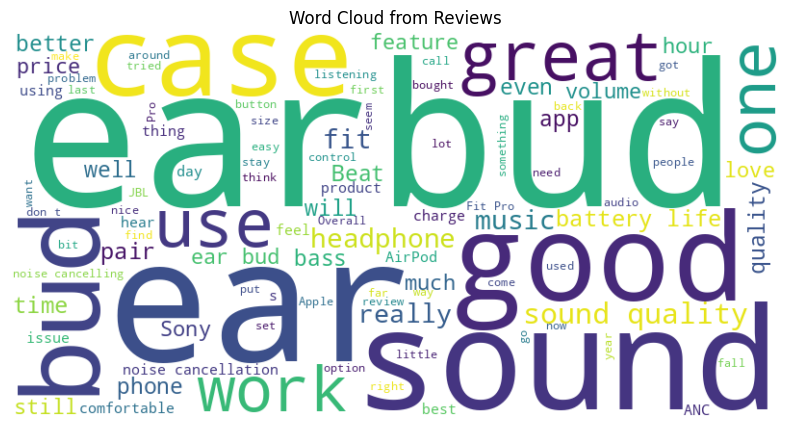

In [21]:
all_text = ' '.join(new_df['content'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      max_words=100, stopwords=None).generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Reviews')
plt.show()

Some notable common terms from reviews besides "earbud" or "ear" are "case", "sound", "good", "quality", "music", and "battery life" So some notable points of interest could be the earbud case, good music or sound quality, and battery life.

In [22]:
new_df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name
343,RUUJJA0TERA67,B096SV8SJG,5.0 out of 5 stars Compared to 4 other Earbuds...,Connor,5,I bought these earbuds along with 4 other pair...,"Reviewed in the United States August 11, 2022",AFEITP6Y25NKH3KB2LXWQCC7STIA,1,2277,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds
344,R3EO2GBST2UICI,B096SV8SJG,5.0 out of 5 stars Initial review and comparis...,philip seitz,5,I love these earbuds. They feel definitely wor...,"Reviewed in the United States September 28, 2023",AFMDCDCHBIWSEI6RDYBCY4MXXVZQ,1,562,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds
345,R2D114QWXW4IOU,B096SV8SJG,5.0 out of 5 stars I think they’re great,Maizy,5,I like the sound a lot. I read a previous revi...,"Reviewed in the United States July 27, 2024",AFRVRGYJJSBAELQK6XVCXXBCJXLA,1,3,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds
346,R29LYUZ7DI2CS6,B096SV8SJG,"4.0 out of 5 stars Quality sound and build, BU...",Everest,4,"After using these for a couple weeks straight,...","Reviewed in the United States August 3, 2024",AEDBORE5CT34E6D7QVXFZW5ZERCA,1,0,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds
347,RRC5SI8P44LH4,B096SV8SJG,5.0 out of 5 stars Excellent -- Budget Friendl...,Mary Trotta,5,Been a few months (May 2024) since the purchas...,"Reviewed in the United States July 21, 2024",AGRC63RAW4DZCOTB2NDTUFP7SRFA,1,3,Color: Sunset PinkStyle: Studio BudsSet: Witho...,Beats Studio Buds


/tmp/ipython-input-1347694403.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')


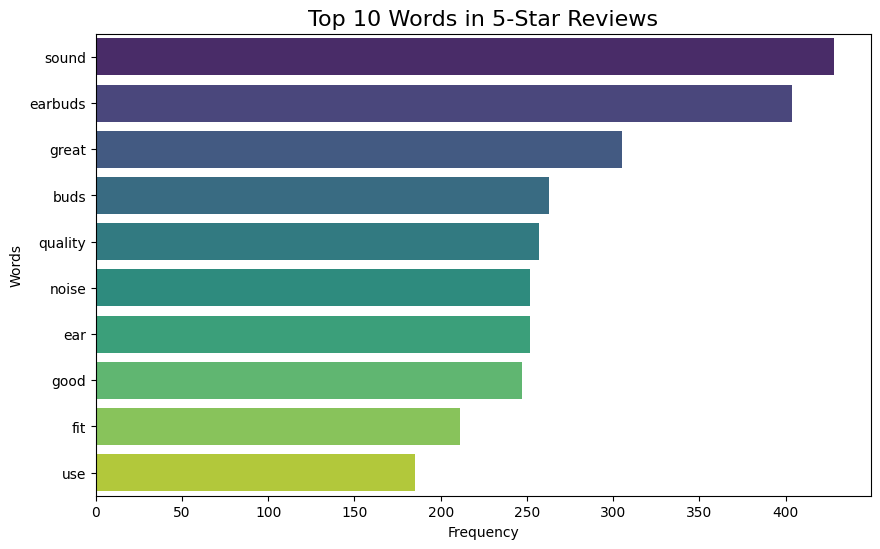

In [47]:
from collections import Counter
import seaborn as sns
import re

# Tokenize the review descriptions for 5-star reviews
from nltk.tokenize import word_tokenize

# 1. Join and clean the review descriptions for 5-star reviews
five_star_reviews = " ".join(review for review in new_df[new_df['rating'] == 5]['content'].dropna())

# Convert to lowercase
five_star_reviews = five_star_reviews.lower()

# Define the list of articles and prepositions to remove
articles = ['a', 'an', 'the', 'of', 'is', 'my', 'i', 'and', 'to', 'they', 'for',
            'that', 'these', 'with', 'them', 'you', 'as', 'in', 'are', 't',
            'but', 'have', 'it', 'on', 'not', 'so', 's', 'was', 'can', 'out',
            'if', 'very', 'had', 'or', 'like', 'this', 'be', 'me', 'all', 'when',
            'where', 'why', 'who', 'how']

#Text Cleaning

# Remove commas and periods (and any other non-alphanumeric character except spaces)
# This will replace things like '.', ',', '!', '?' with a space
cleaned_reviews = re.sub(r'[^a-zA-Z\s]', ' ', five_star_reviews)

# Remove extra spaces caused by the substitution
cleaned_reviews = re.sub(r'\s+', ' ', cleaned_reviews).strip()

# Tokenize the cleaned text
tokens = word_tokenize(cleaned_reviews)

# Filter out articles and any empty strings that might have resulted from cleaning
tokens = [word for word in tokens if word not in articles and word]

# Count word frequencies
common_words = Counter(tokens).most_common(10)

# Create a DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')
plt.title("Top 10 Words in 5-Star Reviews", fontsize=16)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

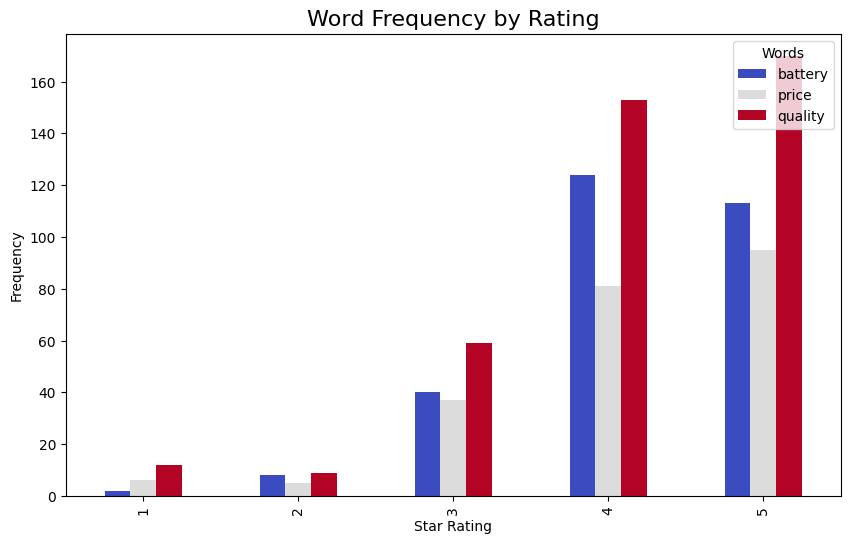

In [49]:
# Define words to compare
words_to_compare = ['battery', 'price', 'quality']

# Count occurrences of each word by rating
word_freq_by_rating = {word: new_df[new_df['content'].str.contains(word, case=False, na=False)]['rating'].value_counts() for word in words_to_compare}

# Create a DataFrame for plotting
freq_df = pd.DataFrame(word_freq_by_rating).fillna(0)

# Plot as a bar chart
freq_df.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title("Word Frequency by Rating", fontsize=16)
plt.xlabel("Star Rating")
plt.ylabel("Frequency")
plt.legend(title="Words", loc='upper right')
plt.show()

/tmp/ipython-input-2518249064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_name', y='rating', data=avg_rating, palette='muted')


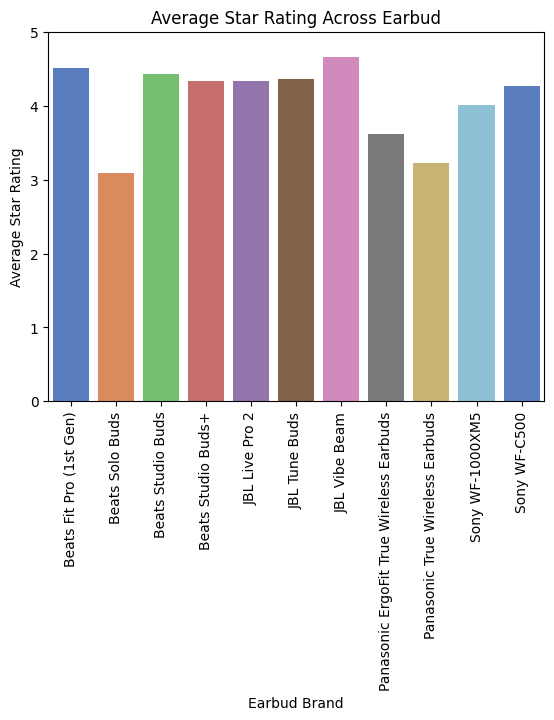

In [53]:
# Calculate average star rating for each product
avg_rating = new_df.groupby('product_name')['rating'].mean().reset_index()

# Plot the average ratings
sns.barplot(x='product_name', y='rating', data=avg_rating, palette='muted')
plt.title("Average Star Rating Across Earbud")
plt.xlabel("Earbud Brand")
plt.ylabel("Average Star Rating")
plt.xticks(rotation=90)
plt.ylim(0, 5)
plt.show()

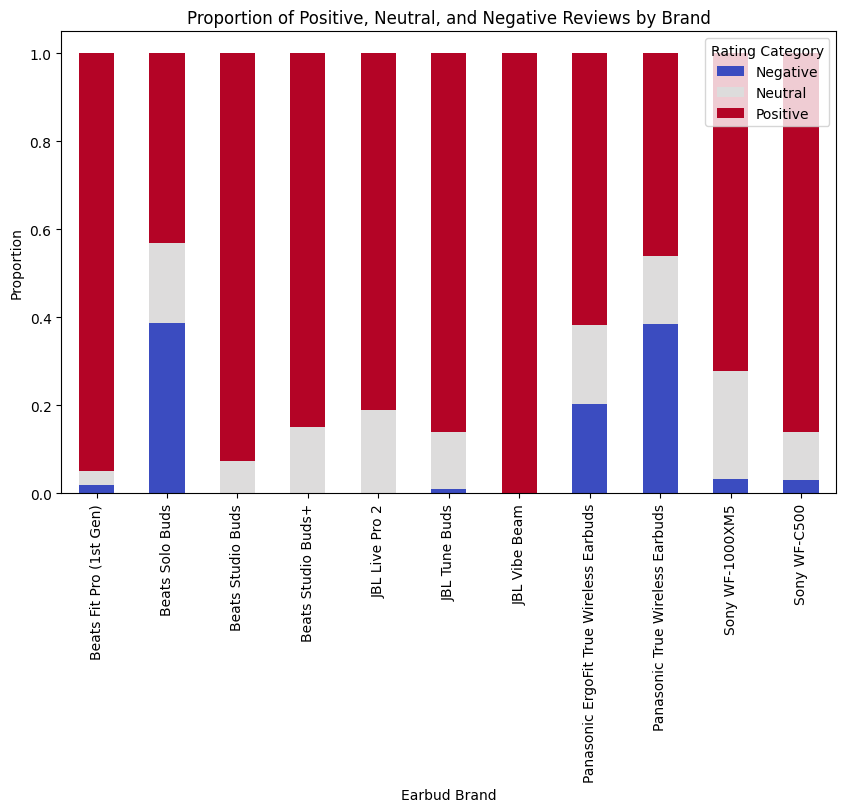

In [55]:
# Define rating categories
def categorize_rating(stars):
    if stars >= 4:
        return 'Positive'
    elif stars == 3:
        return 'Neutral'
    else:
        return 'Negative'

# Add a new column for rating categories
new_df['Rating Category'] = new_df['rating'].apply(categorize_rating)

# Calculate proportions by product
rating_proportions = new_df.groupby(['product_name', 'Rating Category']).size().unstack(fill_value=0)
rating_proportions = rating_proportions.div(rating_proportions.sum(axis=1), axis=0)

# Plot the proportions
rating_proportions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Proportion of Positive, Neutral, and Negative Reviews by Brand")
plt.xlabel("Earbud Brand")
plt.ylabel("Proportion")
plt.legend(title="Rating Category", loc="upper right")
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-1570234769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='product_name', y='rating', data=df, palette='Set3')


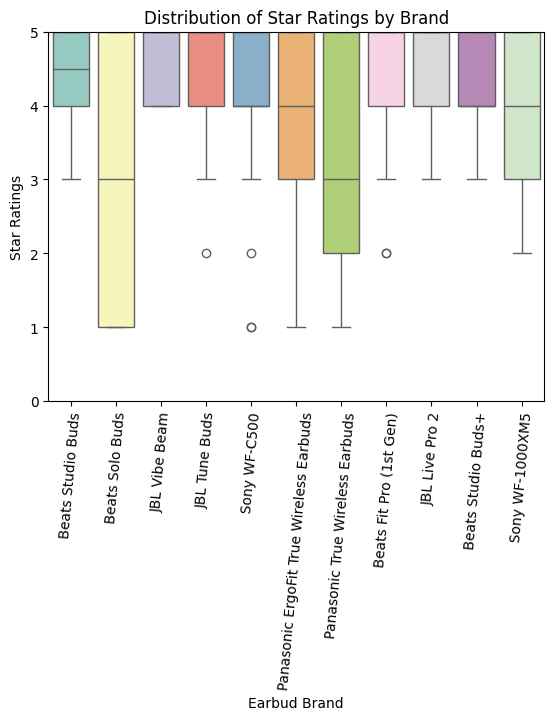

In [58]:
# Box plot of star ratings by brand
sns.boxplot(x='product_name', y='rating', data=df, palette='Set3')
plt.title("Distribution of Star Ratings by Brand")
plt.xlabel("Earbud Brand")
plt.ylabel("Star Ratings")
plt.xticks(rotation=85)
plt.ylim(0, 5)
plt.show()

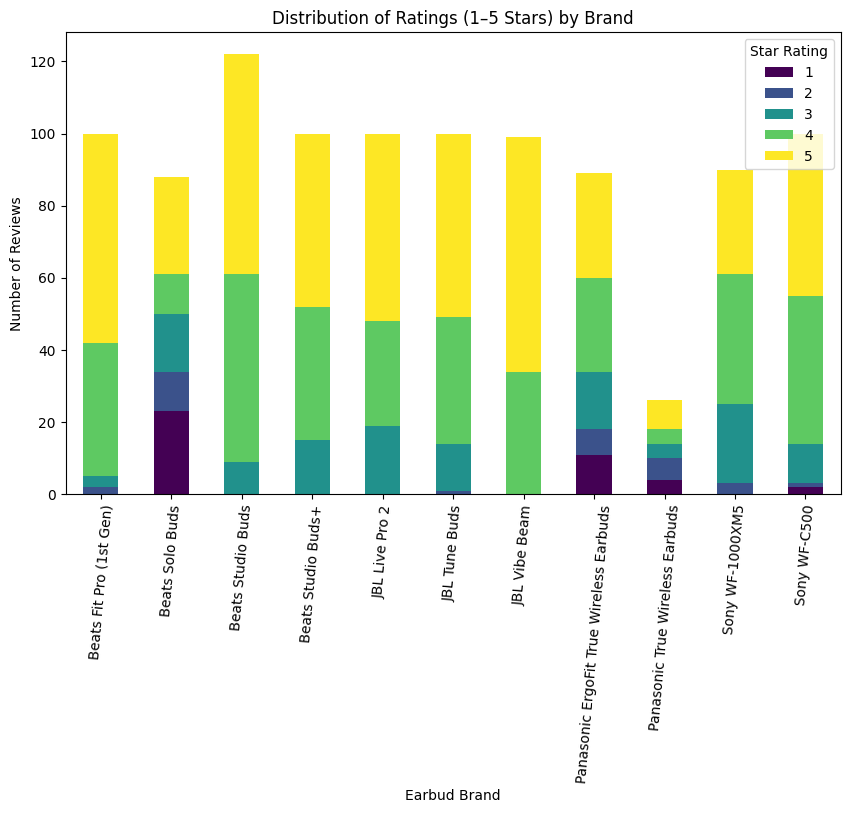

In [60]:
# Count the number of each star rating per product
rating_counts = new_df.groupby(['product_name', 'rating']).size().unstack(fill_value=0)

# Plot the stacked bar chart
rating_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Distribution of Ratings (1–5 Stars) by Brand")
plt.xlabel("Earbud Brand")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=85)
plt.legend(title="Star Rating", loc="upper right")
plt.show()

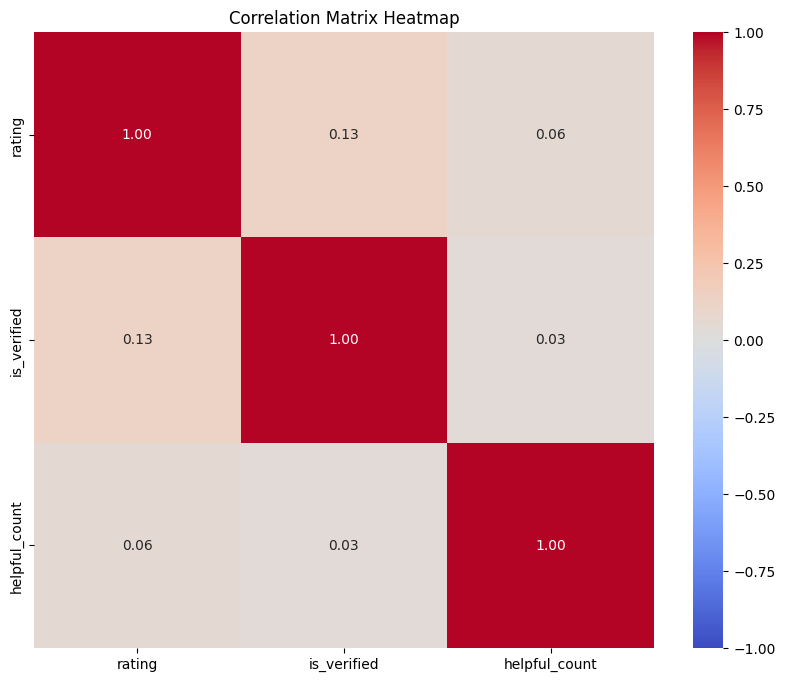

In [62]:
# Calculate the correlation matrix
correlation_matrix = new_df.select_dtypes(include=['number']).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()